Task 1 Loom Video: 

Task 2 Loom Video:

Task 3 Loom Video: 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from scipy.stats import levene

In [16]:
# My Covid-19 dataset
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)

TASK 1: Paired Data Analysis

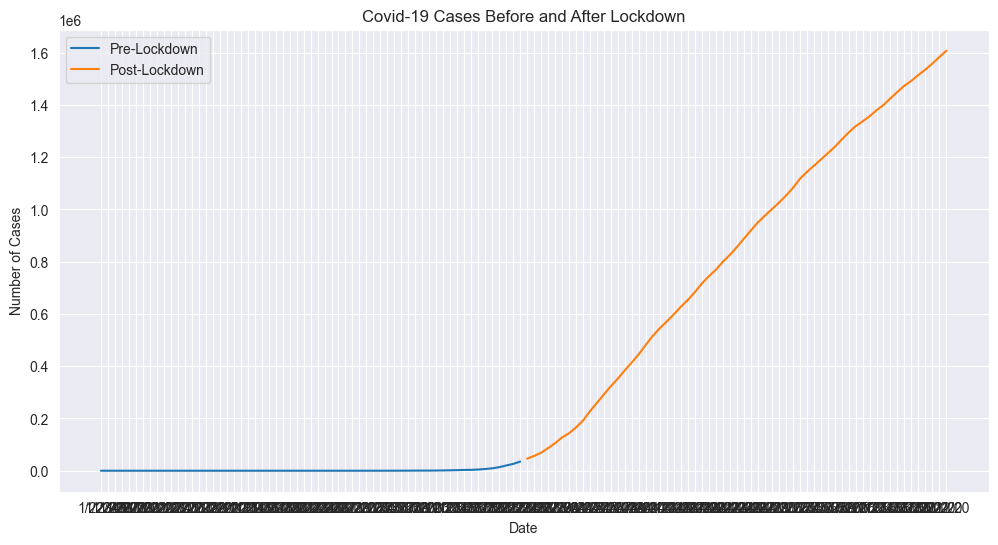

In [17]:
# Data cleaning and preparation steps. I am filtering data to only include US cases during a specific range of dates
country = "US"
pre_lockdown_dates = pd.date_range(start='2020-01-22', end='2020-03-22')
post_lockdown_dates = pd.date_range(start='2020-03-23', end='2020-05-22')

# Summing cases for the specified date ranges
pre_lockdown = data.loc[data['Country/Region'] == country, pre_lockdown_dates.strftime('%-m/%-d/%y')].sum(axis=0)
post_lockdown = data.loc[data['Country/Region'] == country, post_lockdown_dates.strftime('%-m/%-d/%y')].sum(axis=0)

# Performing a paired t-test
t_stat, p_value = stats.ttest_rel(pre_lockdown.values, post_lockdown.values)
t_stat, p_value

# My visuals of the data
plt.figure(figsize=(12, 6))
plt.plot(pre_lockdown.index, pre_lockdown.values, label='Pre-Lockdown')
plt.plot(post_lockdown.index, post_lockdown.values, label='Post-Lockdown')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Covid-19 Cases Before and After Lockdown')
plt.show()

TASK 2: Multiple Population Means Analysis

                  Anova
         F Value  Num DF   Den DF  Pr > F
-----------------------------------------
Country 1486.2318 2.0000 2284.0000 0.0000



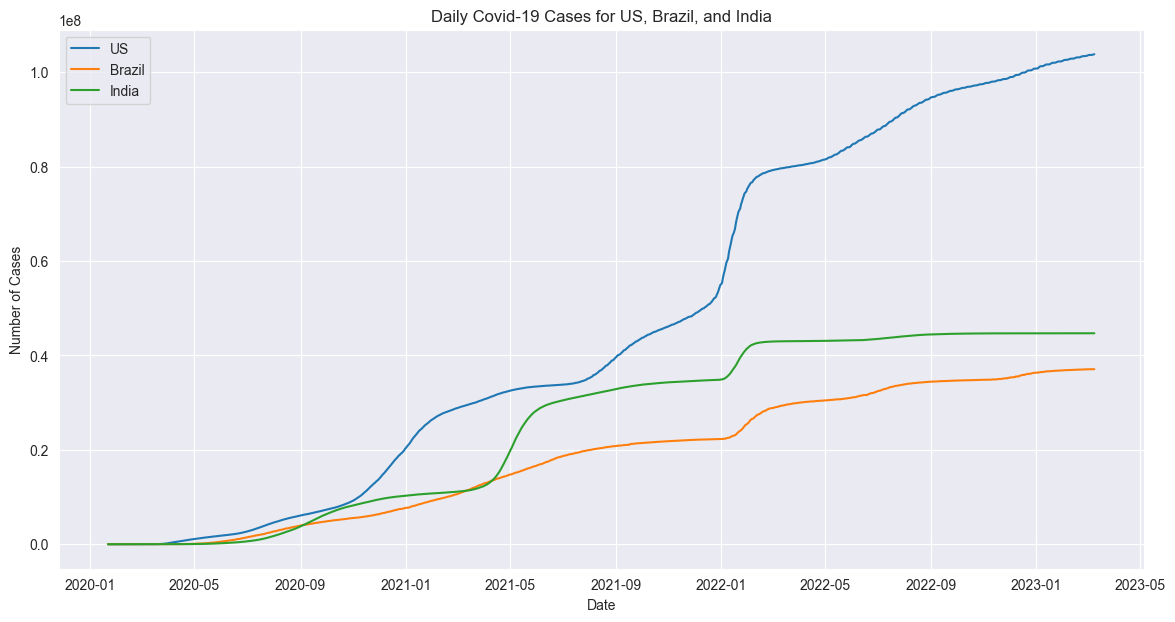

In [18]:
# Select data for a few countries
countries = ["US", "Brazil", "India"]
country_data = data[data['Country/Region'].isin(countries)]

# Drop columns that are not dates
country_data = country_data.drop(columns=['Province/State', 'Lat', 'Long'])

# Reshape the data
melted_data = country_data.melt(id_vars=["Country/Region"], var_name="Date", value_name="Cases")

# Rename columns to remove special characters and spaces
melted_data.columns = ['Country', 'Date', 'Cases']

# Parse dates with specified format
melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%m/%d/%y')

# Summarize cases by country and date
summary_data = melted_data.groupby(['Country', 'Date']).sum().reset_index()

# Perform ANOVA
anova_result = AnovaRM(data=summary_data, depvar='Cases', subject='Date', within=['Country']).fit()
print(anova_result.summary())

# Plotting the data
plt.figure(figsize=(14, 7))
for country in countries:
    country_subset = summary_data[summary_data['Country'] == country]
    plt.plot(country_subset['Date'], country_subset['Cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily Covid-19 Cases for US, Brazil, and India')
plt.legend()
plt.show()

TASK 3: Variance Comparison Analysis

Levene's test statistic: 697.768935462026, p-value: 6.220751717983029e-255


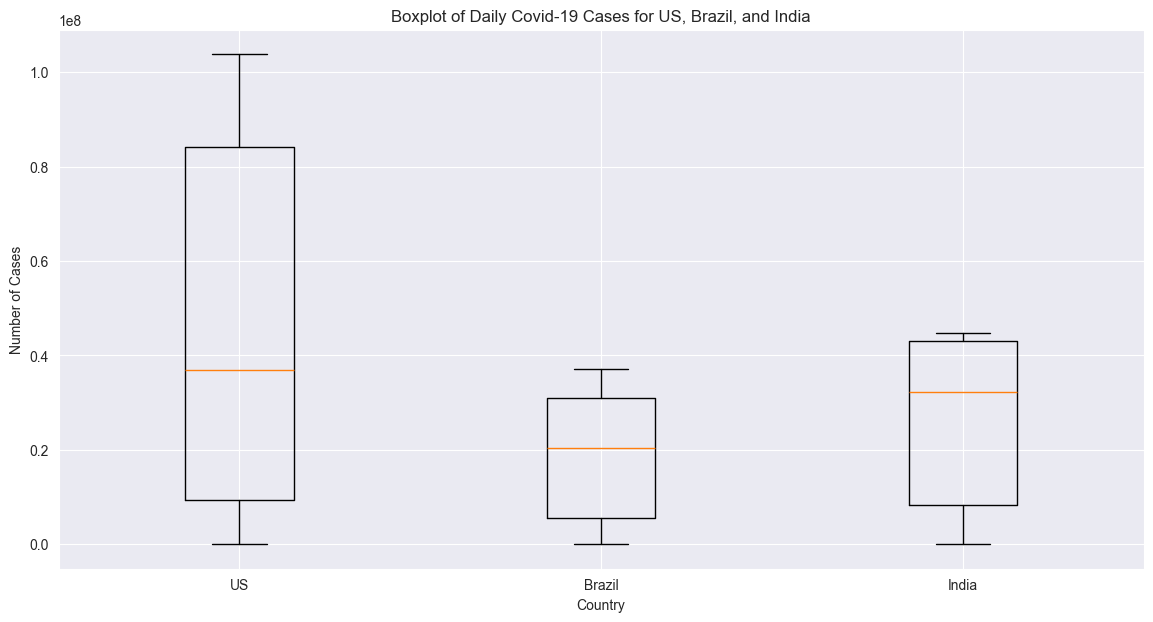

In [19]:
# Select data for a few countries
countries = ["US", "Brazil", "India"]
country_data = data[data['Country/Region'].isin(countries)]

# Drop columns that are not dates
country_data = country_data.drop(columns=['Province/State', 'Lat', 'Long'])

# Reshape the data
melted_data = country_data.melt(id_vars=["Country/Region"], var_name="Date", value_name="Cases")

# Rename columns to remove special characters and spaces
melted_data.columns = ['Country', 'Date', 'Cases']

# Parse dates with specified format
melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%m/%d/%y')

# Summarize cases by country and date
summary_data = melted_data.groupby(['Country', 'Date']).sum().reset_index()

# Perform Levene's test
us_cases = summary_data[summary_data['Country'] == 'US']['Cases']
brazil_cases = summary_data[summary_data['Country'] == 'Brazil']['Cases']
india_cases = summary_data[summary_data['Country'] == 'India']['Cases']

stat, p_value = levene(us_cases, brazil_cases, india_cases)
print(f"Levene's test statistic: {stat}, p-value: {p_value}")

# Plotting the data
plt.figure(figsize=(14, 7))
plt.boxplot([us_cases, brazil_cases, india_cases], tick_labels=countries)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('Boxplot of Daily Covid-19 Cases for US, Brazil, and India')
plt.show()